In [1]:
# Imports
import os

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

README

# Drive on Mars

![Mars rover](https://panoptes-uploads.zooniverse.org/production/project_attached_image/17243d9d-1258-4aa7-80f0-6e7b20e957c6.png)

With this project we are attempting to improve the future of self driving vehicles on Mars.
Current autonomous vehicles driving algorithms are trained for streets and roads, very different from the conditions on Mars. 

Our model will predict which kind of terrains lies ahead of a rover: from soil, sand, bedrock or big rocks. This informs a rover navigation on the best route to take. We will build an image segmentation classifier, with a trained model available online.



# To work on this project:

## Clone this repo
`git clone  git@github.com:TigerManon/drive-on-mars.git`

## Download the data from Kaggle

[AI4MARS dataset](https://www.kaggle.com/datasets/yash92328/ai4mars-terrainaware-autonomous-driving-on-mars/data)


```
mv archive.zip <your-path-to-the-repo>/drive-on-mars/raw_data
cd <your-path-to-the-repo>/drive-on-mars/raw_data
unzip archive.zip
rm archive.zip
```

# For our team

Use the following commands

`path-to-the-repo =  ~/code/TigerManon`

```
mv archive.zip ~/code/TigerManon/drive-on-mars/raw_data
cd ~/code/TigerManon/drive-on-mars/raw_data
unzip archive.zip
rm archive.zip

pip install requirements.txt
```


## Defining paths

In [2]:
# Customize your path here
root_path = '../'

In [3]:
DATA_PATH = os.path.join(root_path, 'raw_data', 'ai4mars-dataset-merged-0.1', 'msl')
DATA_PATH

'../raw_data/ai4mars-dataset-merged-0.1/msl'

In [4]:
IMAGE_PATH = os.path.join(DATA_PATH, 'images', 'edr')
MASK_PATH_TRAIN = os.path.join(DATA_PATH, 'labels', 'train')
MASK_PATH_TEST3 = os.path.join(DATA_PATH, 'labels', 'test', 'masked-gold-min3-100agree')

MASK_ROVER = os.path.join(DATA_PATH, 'images', 'mxy')
RANGE_30M = os.path.join(DATA_PATH, 'images', 'rng-30m')

In [5]:
images = os.listdir(IMAGE_PATH)
print(f"Found {len(images)} images in {IMAGE_PATH}")

rover_masks = os.listdir(MASK_ROVER) 
print(f"Found {len(rover_masks)} images in {MASK_ROVER}")

range_masks = os.listdir(RANGE_30M) 
print(f"Found {len(range_masks)} images in {RANGE_30M}")


Found 18130 images in ../raw_data/ai4mars-dataset-merged-0.1/msl/images/edr
Found 18097 images in ../raw_data/ai4mars-dataset-merged-0.1/msl/images/mxy
Found 18096 images in ../raw_data/ai4mars-dataset-merged-0.1/msl/images/rng-30m


In [6]:
color_channels = 1

### Opening an image

#### matplotlib

In [7]:
# Testing with first image
test = 3
imname = images[test].split('.')[0]
imname

'NLB_444289841EDR_F0260000NCAM00252M1'

In [8]:
image_file = os.path.join(IMAGE_PATH,images[test])
image_file

'../raw_data/ai4mars-dataset-merged-0.1/msl/images/edr/NLB_444289841EDR_F0260000NCAM00252M1.JPG'

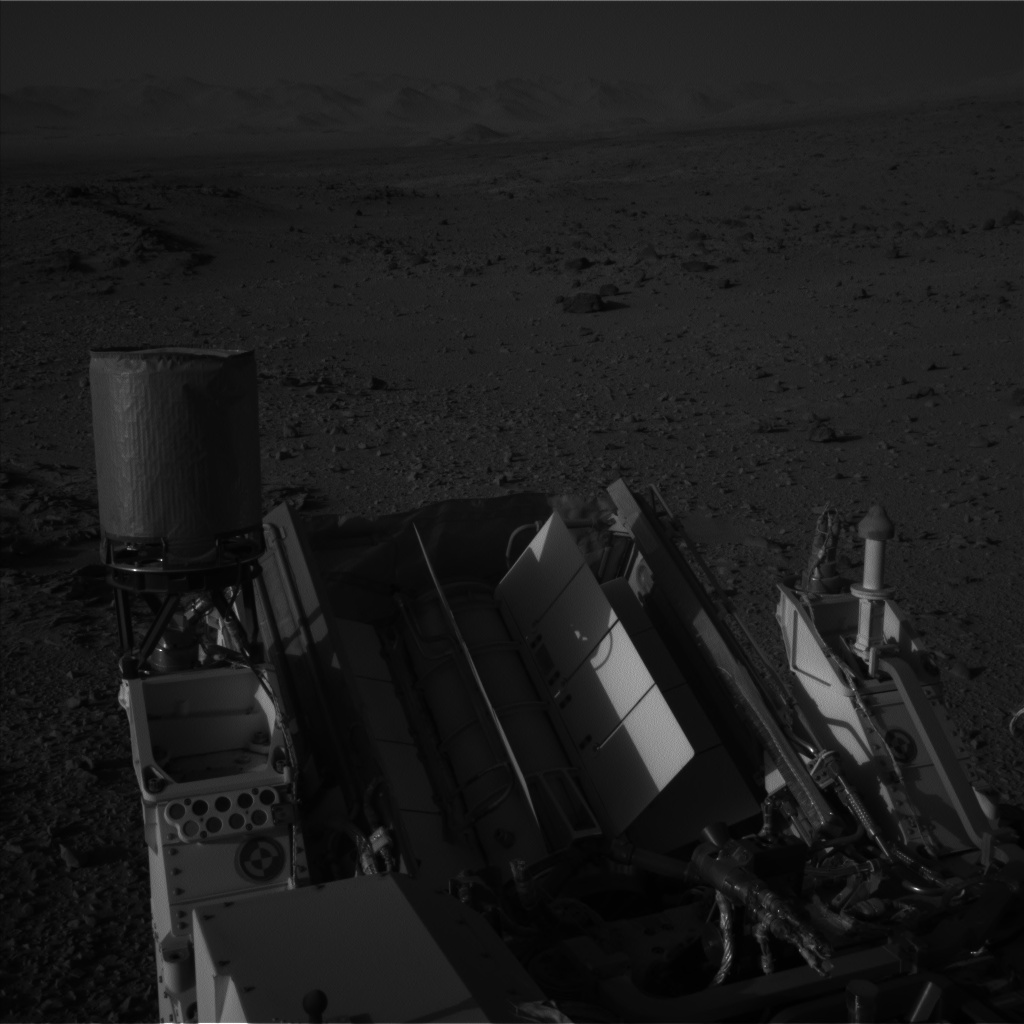

In [9]:
from IPython.display import Image, display

for i in [3]:
    image_file = os.path.join(IMAGE_PATH,images[i])
    display(Image(filename=image_file,width=400) )

In [10]:
image_arr = plt.imread(image_file)
print(type(image_arr))
print(image_arr.shape)
print(max(image_arr.flatten()))
image_arr

<class 'numpy.ndarray'>
(1024, 1024)
255


array([[74, 85, 89, ..., 83, 80, 88],
       [27, 35, 36, ..., 34, 32, 37],
       [26, 31, 30, ..., 31, 30, 32],
       ...,
       [12, 15, 15, ...,  6,  7,  7],
       [11, 14, 14, ...,  6,  7,  7],
       [28, 31, 32, ..., 13, 13, 14]], dtype=uint8)

#### cv2

In [11]:
import cv2

In [12]:
img_raw = cv2.imread(image_file)
img = np.zeros((1024,1024))
img[:,:] = img_raw[:,:,0]
img

array([[74., 85., 89., ..., 83., 80., 88.],
       [27., 35., 36., ..., 34., 32., 37.],
       [26., 31., 30., ..., 31., 30., 32.],
       ...,
       [12., 15., 15., ...,  6.,  7.,  7.],
       [11., 14., 14., ...,  6.,  7.,  7.],
       [28., 31., 32., ..., 13., 13., 14.]])

In [13]:
image_file

'../raw_data/ai4mars-dataset-merged-0.1/msl/images/edr/NLB_444289841EDR_F0260000NCAM00252M1.JPG'

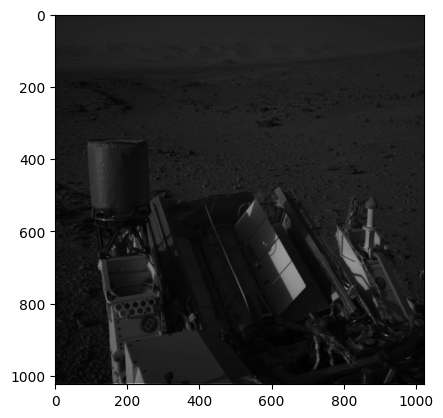

In [14]:
plt.imshow(img,cmap='gray')

#### Masks

In [15]:
mask_file = os.path.join(MASK_ROVER, imname.replace("EDR","MXY") + ".png")
mask_file

'../raw_data/ai4mars-dataset-merged-0.1/msl/images/mxy/NLB_444289841MXY_F0260000NCAM00252M1.png'

In [16]:
mask_raw = np.array(cv2.imread(mask_file))
mask_raw
mask = np.zeros((1024,1024))
mask[:,:] = mask_raw[:,:,0]
mask = 1-mask

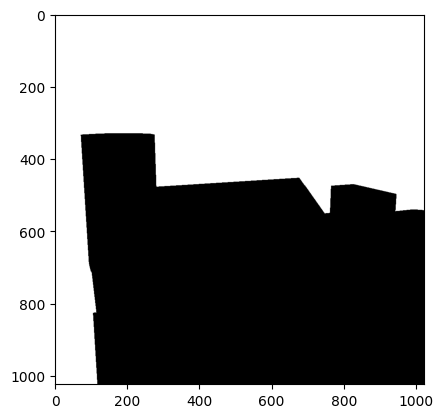

In [17]:
plt.imshow(mask,cmap='gray') 
plt.title;

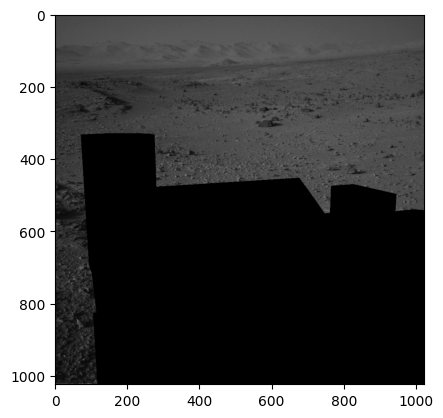

In [18]:
img_mask = img * mask
plt.imshow(img_mask,cmap='gray') ;

In [19]:
range_mask_file = os.path.join(RANGE_30M, imname.replace("EDR","RNG") + ".png")
range_mask_file


'../raw_data/ai4mars-dataset-merged-0.1/msl/images/rng-30m/NLB_444289841RNG_F0260000NCAM00252M1.png'

In [20]:
range_30m_raw = np.array(cv2.imread(range_mask_file))

range_30m = np.zeros((1024,1024))
range_30m[:,:] = range_30m_raw[:,:,0]
range_30m = 1 - range_30m
range_30m

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

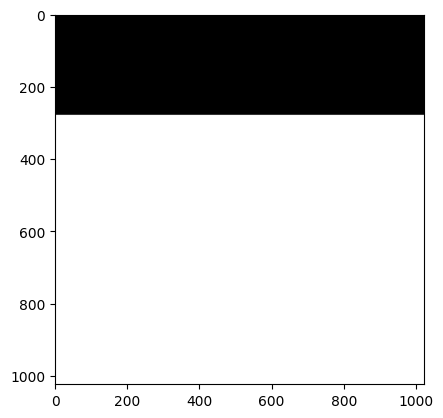

In [21]:
plt.imshow(range_30m,cmap='gray') ;

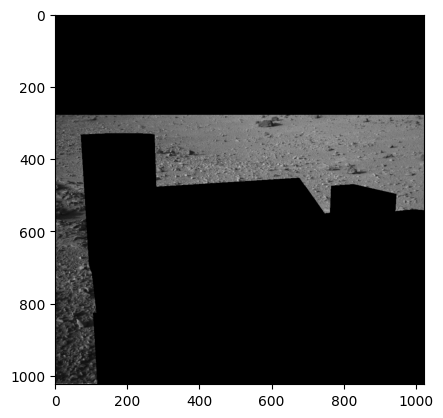

In [22]:
img_mask = img * mask * range_30m
plt.imshow(img_mask,cmap='gray') ;

In [24]:
img_mask

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [12., 15., 15., ...,  0.,  0.,  0.],
       [11., 14., 14., ...,  0.,  0.,  0.],
       [28., 31., 32., ...,  0.,  0.,  0.]])

In [29]:
# Couleurs pour les différentes catégories de terrain
colors = {
    'soil': (1, 0, 0),  # Rouge
    'bedrock': (0, 1, 0),  # Vert
    'sand': (0, 0, 1),  # Bleu
    'big_rocks': (1, 1, 0),  # Jaune
    # Ajoutez plus de catégories et couleurs si nécessaire
}

img = cv2.imread(image_file)

color_mask = np.zeros_like(img)

# Charger et appliquer chaque masque de terrain
for terrain_type, color in colors.items():
    mask_file = os.path.join(MASK_PATH, imname.replace("EDR", terrain_type.upper()) + ".png")
    mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)
    color_mask[mask == 255] = color  # Présumant que le masque est en 255 pour les zones marquées

# Superposer le masque coloré sur l'image originale
img_with_masks = cv2.addWeighted(img, 1, color_mask, 0.5, 0)

# Affichage de l'image avec les masques colorés
plt.imshow(cv2.cvtColor(img_with_masks, cv2.COLOR_BGR2RGB))
plt.show()

NameError: name 'superposed_image' is not defined